In [1]:
from DynGenModels.trainer.trainer import DynGenModelTrainer
from DynGenModels.configs.toys_configs import Gauss_2_Moons_MLP_FlowMatch as Configs

configs_fwd = Configs(DATA = '8Gauss2Moons',
                num_points = 10000,
                data_split_fracs = [0.8976, 0.0, 0.1024],
                batch_size = 256,
                EPOCHS = 1000,
                print_epochs = 10,
                DEVICE= 'cuda:0',
                fix_seed = 12345,
                lr = 1e-3,
                MODEL = 'MLP_fwd',
                dim_hidden = 64, 
                sigma = 0.1,
                solver='midpoint',
                num_sampling_steps=200  
               )

#...set working directory for results:

configs_fwd.set_workdir(path='../../results', save_config=True)

from DynGenModels.trainer.trainer import DynGenModelTrainer
from DynGenModels.configs.toys_configs import Gauss_2_Moons_MLP_FlowMatch as Configs

configs_bwd = Configs(DATA = '8Gauss2Moons',
                exchange_source_with_target=True,
                num_points = 10000,
                data_split_fracs = [0.8976, 0.0, 0.1024],
                batch_size = 256,
                EPOCHS = 1000,
                print_epochs = 10,
                DEVICE = 'cuda:0',
                fix_seed = 12345,
                lr = 1e-3,
                MODEL = 'MLP_bwd', 
                dim_hidden = 64, 
                sigma = 0.1,
                solver='midpoint',
                num_sampling_steps=200  
               )

#...set working directory for results:

configs_bwd.set_workdir(path='../../results', save_config=True)


#======================================================================================
INFO: created directory: ../../results/8Gauss2Moons.FlowMatch.MLP_fwd.2023.11.14_17h02
#======================================================================================
+-----------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Parameters                  | Values                                                                                                                                                                                                                         |
+-----------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [2]:
from DynGenModels.datamodules.toys.datasets import Gauss_2_Moons_Dataset 
from DynGenModels.datamodules.toys.dataloader import ToysDataLoader 

toys_fwd = Gauss_2_Moons_Dataset(configs_fwd)
dataloader_fwd = ToysDataLoader(toys_fwd, configs_fwd)

toys_bwd = Gauss_2_Moons_Dataset(configs_bwd)
dataloader_bwd = ToysDataLoader(toys_bwd, configs_bwd)

INFO: building dataloaders...
INFO: train/val/test split ratios: 0.8976/0.0/0.1024
INFO: train size: 8976, validation size: 0, testing sizes: 1024
INFO: building dataloaders...
INFO: train/val/test split ratios: 0.8976/0.0/0.1024
INFO: train size: 8976, validation size: 0, testing sizes: 1024


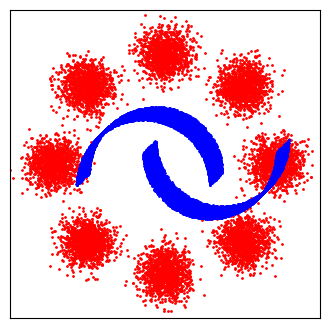

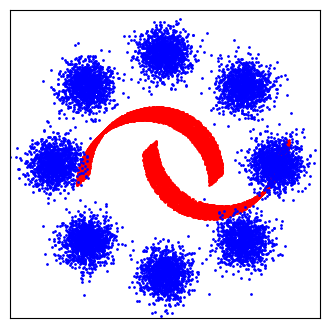

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize=(4,4))
plt.scatter(toys_fwd.source[..., 0], toys_fwd.source[..., 1], s=1, color='red')
plt.scatter(toys_fwd.target[..., 0], toys_fwd.target[..., 1], s=1, color='blue')
plt.xlim(-7,7)
plt.ylim(-7,7)
plt.xticks([])
plt.yticks([])
plt.show()

fig, ax = plt.subplots(1,1, figsize=(4,4))
plt.scatter(toys_bwd.source[..., 0], toys_bwd.source[..., 1], s=1, color='red')
plt.scatter(toys_bwd.target[..., 0], toys_bwd.target[..., 1], s=1, color='blue')
plt.xlim(-7,7)
plt.ylim(-7,7)
plt.xticks([])
plt.yticks([])
plt.show()

### 1. Conditional Flow-matching

In [3]:
from DynGenModels.models.deep_nets import MLP
from DynGenModels.dynamics.cnf.condflowmatch import OptimalTransportFlowMatching as dynamics

cfm_fwd = DynGenModelTrainer(dynamics = dynamics(configs_fwd),
                         model = MLP(configs_fwd), 
                         dataloader = dataloader_fwd, 
                         configs = configs_fwd)

cfm_fwd.train()

2023-11-14 17:02:27.293867: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-14 17:02:28.174703: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
number of training parameters: 8706
start training...


epochs:   0%|          | 0/1000 [00:00<?, ?it/s]

	Epoch: 1, train loss: 1.0539368175797994, valid loss: 0  (min valid loss: inf)
	Epoch: 11, train loss: 0.4721557787723011, valid loss: 0  (min valid loss: inf)
	Epoch: 21, train loss: 0.41946647688746447, valid loss: 0  (min valid loss: inf)
	Epoch: 31, train loss: 0.33529957756400114, valid loss: 0  (min valid loss: inf)
	Epoch: 41, train loss: 0.33849122002720833, valid loss: 0  (min valid loss: inf)
	Epoch: 51, train loss: 0.4754933768676386, valid loss: 0  (min valid loss: inf)
	Epoch: 61, train loss: 0.34141999110579496, valid loss: 0  (min valid loss: inf)
	Epoch: 71, train loss: 0.3867066125902865, valid loss: 0  (min valid loss: inf)
	Epoch: 81, train loss: 0.2872127753992875, valid loss: 0  (min valid loss: inf)
	Epoch: 91, train loss: 0.2994621789289846, valid loss: 0  (min valid loss: inf)
	Epoch: 101, train loss: 0.30106333436237437, valid loss: 0  (min valid loss: inf)
	Epoch: 111, train loss: 0.27380311489105225, valid loss: 0  (min valid loss: inf)
	Epoch: 121, train lo

INFO: neural ODE solver with midpoint method and steps=200


/home/df630/.conda/envs/flow_match_env/lib/python3.9/site-packages/torchdyn/numerics/odeint.py:84: UserWarning: Setting tolerances has no effect on fixed-step methods
  warn("Setting tolerances has no effect on fixed-step methods")


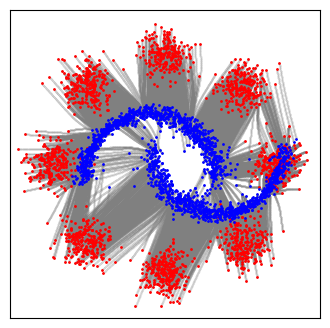

In [4]:
from DynGenModels.pipelines.SamplingPipeline import FlowMatchPipeline 
pipeline_fwd = FlowMatchPipeline(trained_model=cfm_fwd, configs=configs_fwd)

pipeline_fwd.generate_samples(toys_fwd.source[:2000])

from utils import plot_trajs

plot_trajs(pipeline_fwd.trajectories, num_sampling_steps=configs_fwd.num_sampling_steps)

In [ ]:
from DynGenModels.pipelines.SamplingPipeline import FlowMatchPipeline 
pipeline_bwd = FlowMatchPipeline(trained_model=cfm_bwd,
                             configs=configs_bwd)

pipeline_bwd.generate_samples(toys_bwd.source[:2000])

from utils import plot_trajs

plot_trajs(pipeline_bwd.trajectories, num_sampling_steps=configs_bwd.num_sampling_steps)

In [5]:
from DynGenModels.models.deep_nets import MLP
from DynGenModels.dynamics.cnf.condflowmatch import OptimalTransportFlowMatching as dynamics

cfm_bwd = DynGenModelTrainer(dynamics = dynamics(configs_bwd),
                         model = MLP(configs_bwd), 
                         dataloader = dataloader_bwd, 
                         configs = configs_bwd)

cfm_bwd.train()

number of training parameters: 8706
start training...


epochs:   0%|          | 0/1000 [00:00<?, ?it/s]

	Epoch: 1, train loss: 0.9271920952532027, valid loss: 0  (min valid loss: inf)
	Epoch: 11, train loss: 0.46368610362211865, valid loss: 0  (min valid loss: inf)
	Epoch: 21, train loss: 0.40477155148983013, valid loss: 0  (min valid loss: inf)
	Epoch: 31, train loss: 0.3811913352045748, valid loss: 0  (min valid loss: inf)
	Epoch: 41, train loss: 0.3006901993519729, valid loss: 0  (min valid loss: inf)
	Epoch: 51, train loss: 0.27502077279819387, valid loss: 0  (min valid loss: inf)
	Epoch: 61, train loss: 0.27707556221220236, valid loss: 0  (min valid loss: inf)
	Epoch: 71, train loss: 0.2660923455324438, valid loss: 0  (min valid loss: inf)
	Epoch: 81, train loss: 0.408408445202642, valid loss: 0  (min valid loss: inf)
	Epoch: 91, train loss: 0.283320026886132, valid loss: 0  (min valid loss: inf)
	Epoch: 101, train loss: 0.41919544215003646, valid loss: 0  (min valid loss: inf)
	Epoch: 111, train loss: 0.2620793860405684, valid loss: 0  (min valid loss: inf)
	Epoch: 121, train loss:

INFO: neural ODE solver with midpoint method and steps=200


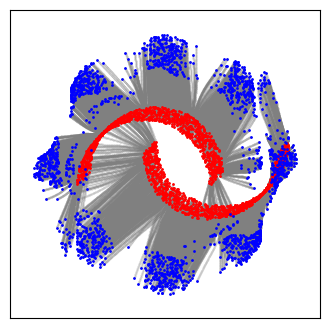

In [6]:
from DynGenModels.pipelines.SamplingPipeline import FlowMatchPipeline 
pipeline_bwd = FlowMatchPipeline(trained_model=cfm_bwd,
                                 configs=configs_bwd)

# Get 2000 random points from toys_fwd.target:
import torch

# Get 2000 random points from toys_bwd.source:
random_points = toys_bwd.source[torch.randperm(toys_bwd.source.shape[0])[:2000]]

pipeline_bwd.generate_samples(random_points)

from utils import plot_trajs

plot_trajs(pipeline_bwd.trajectories, num_sampling_steps=configs_bwd.num_sampling_steps)

### 2. Optimal transport flow-matching

In [7]:
from DynGenModels.models.deep_nets import MLP
from DynGenModels.dynamics.cnf.condflowmatch import OptimalTransportFlowMatching

cfm = DynGenModelTrainer(dynamics = OptimalTransportFlowMatching(configs),
                         model = MLP(configs), 
                         dataloader = dataloader, 
                         configs = configs)

cfm.train()

number of training parameters: 8706
start training...


epochs:   0%|          | 0/1000 [00:00<?, ?it/s]

In [8]:
from DynGenModels.pipelines.SamplingPipeline import FlowMatchPipeline 
pipeline = FlowMatchPipeline(trained_model=cfm,
                             source_input=toys.source[:2000],
                             configs=configs)

INFO: neural ODE solver with dopri5 method and steps=100


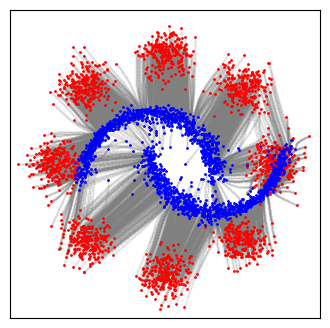

In [9]:
from utils import plot_trajs
plot_trajs(pipeline.trajectories, num_sampling_steps=configs.num_sampling_steps)

### 3. Schrodinger Bridge flow-matching

In [8]:
from DynGenModels.models.deep_nets import MLP
from DynGenModels.dynamics.cnf.condflowmatch import SchrodingerBridgeFlowMatching

cfm = DynGenModelTrainer(dynamics = SchrodingerBridgeFlowMatching(configs),
                         model = MLP(configs), 
                         dataloader = dataloader, 
                         configs = configs)

cfm.train()

2023-11-10 17:38:12.712633: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-10 17:38:13.326892: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
number of training parameters: 8706
start training...


epochs:   0%|          | 0/1000 [00:00<?, ?it/s]

	Epoch: 1, train loss: 0.8464491698477001, valid loss: 0  (min valid loss: inf)
	Epoch: 101, train loss: 0.4192247343146138, valid loss: 0  (min valid loss: inf)
	Epoch: 201, train loss: 0.25121326102978647, valid loss: 0  (min valid loss: inf)
	Epoch: 301, train loss: 0.37490144723819363, valid loss: 0  (min valid loss: inf)
	Epoch: 401, train loss: 0.30459060975246954, valid loss: 0  (min valid loss: inf)
	Epoch: 501, train loss: 0.3119221640129884, valid loss: 0  (min valid loss: inf)
	Epoch: 601, train loss: 0.24430848099291327, valid loss: 0  (min valid loss: inf)
	Epoch: 701, train loss: 0.28752701357007027, valid loss: 0  (min valid loss: inf)
	Epoch: 801, train loss: 0.2811617126895322, valid loss: 0  (min valid loss: inf)
	Epoch: 901, train loss: 0.23321761832469037, valid loss: 0  (min valid loss: inf)


In [9]:
from DynGenModels.pipelines.SamplingPipeline import FlowMatchPipeline 
pipeline = FlowMatchPipeline(trained_model=cfm,
                             source_input=toys.source[:2000],
                             configs=configs)

INFO: neural ODE solver with dopri5 method and steps=100


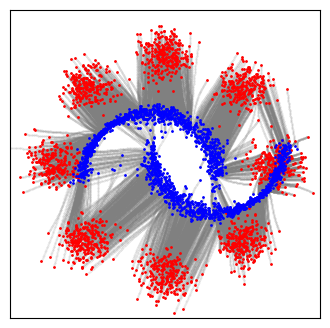

In [10]:
from utils import plot_trajs
plot_trajs(pipeline.trajectories, num_sampling_steps=configs.num_sampling_steps)